<a href="https://colab.research.google.com/github/suchitra2020180/RS_GIS_Python/blob/main/Colab_Basics_Spatial_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day1: Colab Basics
Google Colab is a hosted Jupyter notebook environment that allows anyone to run Python code via a web-browser. It provides you free computation and data storage that can be utilized by your Python code.

You can click the +Code button to create a new cell and enter a block of code. To run the code, click the Run Code button next to the cell, or press Shirt+Enter key.

# Package Management: To list and import preinstalled packages

In [ ]:
!pip list -v

Package                            Version             Location                                Installer
---------------------------------- ------------------- --------------------------------------- ---------
absl-py                            1.4.0               /usr/local/lib/python3.10/dist-packages uv
accelerate                         0.34.2              /usr/local/lib/python3.10/dist-packages uv
aiohappyeyeballs                   2.4.3               /usr/local/lib/python3.10/dist-packages uv
aiohttp                            3.10.10             /usr/local/lib/python3.10/dist-packages uv
aiosignal                          1.3.1               /usr/local/lib/python3.10/dist-packages uv
alabaster                          0.7.16              /usr/local/lib/python3.10/dist-packages uv
albucore                           0.0.16              /usr/local/lib/python3.10/dist-packages uv
albumentations                     1.4.15              /usr/local/lib/python3.10/dist-packages uv
altair

In [ ]:
#To import pre-installed python packages in colab
import pandas as pd
import geopandas as gpd


#To install third party packages

In [ ]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.4 MB/s eta 0:00:00


In [ ]:
import rioxarray

#Data Management

Colab provides 100GB of disk space along with your notebook. This can be used to store your data, intermediate outputs and results.

The code below will create 2 folders named 'data' and 'output' in your local filesystem.

In [75]:
#Import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import os
main_path="/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python"
data_folder="data"
output_folder="output"

data_folder_path=os.path.join(main_path,data_folder)
output_folder_path=os.path.join(main_path,output_folder)

if not os.path.exists(data_folder_path):
  os.mkdir(data_folder_path)

if not os.path.exists(output_folder_path):
  os.mkdir(output_folder_path)

Downloading data through internet and store it in the Colab environment and in google drive. Here is a helper function to download a file from a URL.

In [77]:
import requests

def download(url):
  filename=os.path.join(data_folder_path,os.path.basename(url))   #Downloaded data will be saved in data folder in drive
  if not os.path.exists(filename):
    with requests.get(url,stream=True,allow_redirects=True) as r:
      with open(filename,'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
          f.write(chunk)
    print('Downloaded', filename)

Lets download "Populated Places" data from Natural Earth (https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)

In [ ]:
#download('http//www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places.zip')
download("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places.zip")

In [ ]:
download("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places_simple.zip")

Downloaded /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_10m_populated_places_simple.zip


In [ ]:
#download('http//www.naturalearthdata.com/download/10m/cultural/'+'ne_10m_populated_places.zip')

First extract data from zip file

In [ ]:
#Trail1
import zipfile
zip_file='ne_10m_populated_places_simple.zip'
zip_file_path=os.path.join(data_folder_path,zip_file)
print('Zip file path:',zip_file_path)
file="ne_10m_populated_places"
extract_to_path=os.path.join(data_folder_path,file)
#data_extracted=os.path.join(data_folder_path,os.path.basename(url)+'extracted')
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print('Files extracted to:', extract_to_path)

Zip file path: /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_10m_populated_places_simple.zip


BadZipFile: File is not a zip file

In [ ]:
#Trail2:
from zipfile import ZipFile
test_folder='test'
extract_to_path=os.path.join(data_folder_path,test_folder)
if not os.path.exists(extract_to_path):
  os.mkdir(extract_to_path)
with ZipFile('/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_110m_populated_places.zip') as zipObj:
  zipObj.extractall(extract_to_path)

#Youtube

In [ ]:
import zipfile
zip_file='ne_10m_populated_places_simple.zip'
zip_file_path=os.path.join(data_folder_path,zip_file)
#places=gpd.read_file(zip_file_path)
places=gpd.read_file(f"zip:{zip_file_path}")


#Trail2:


DataSourceError: '/vsizip//content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/ne_10m_populated_places_simple.zip' does not exist in the file system, and is not recognized as a supported dataset name.

Lets read the file using geopandas

In [ ]:
file='ne_110m_populated_places.zip'
filepath=os.path.join(data_folder_path,file)
print('Filepath:',filepath)
places=gpd.read_file(filepath)

#data = gpd.read_file(f"zip://{filepath}")
places.head()

In [ ]:
capitals=places[places['adm0cap']==1]
capitals

NameError: name 'places' is not defined

Saving the result as a geopackage file

In [ ]:
output_file = 'capitals.gpkg'
output_path = os.path.join(output_folder, output_file)
capitals.to_file(driver='GPKG', filename=output_path)

Open it in QGIS

Day2: Matplotlib Basics

In [ ]:
import os
import matplotlib.pyplot as plt

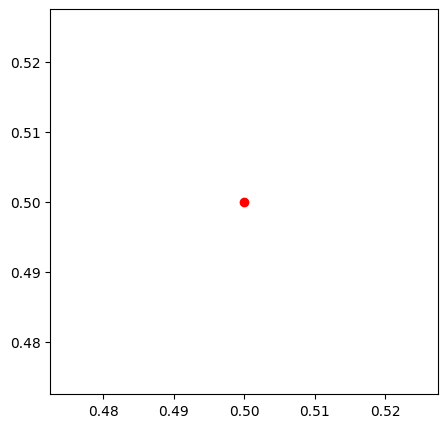

In [ ]:
#Displaying a single point on figure
point=(0.5,0.5)

fig, ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(point[0],point[1],'ro')
plt.show()

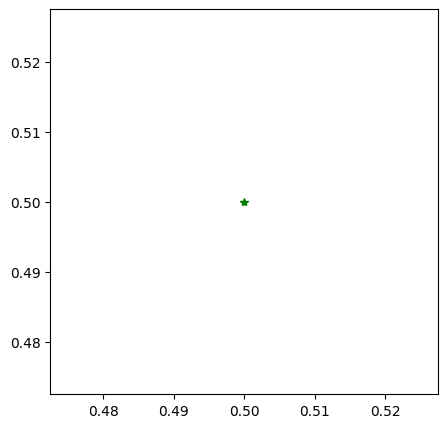

In [ ]:
#Displaying a single point on figure
point=(0.5,0.5)

fig, ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(point[0],point[1],color='green',marker='*')
plt.show()

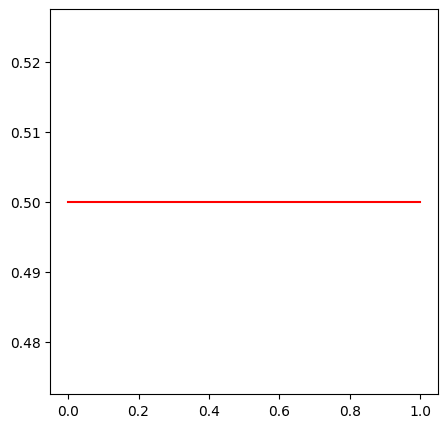

In [ ]:
#Displaying a single point on figure
point=(0.5,0.5)

fig, ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(point,'r')  #Here When you pass a tuple directly as a single argument like ax.plot(point, 'red'), it treats the tuple as a sequence of y values, implicitly assuming the x values to be [0, 1], resulting in a line plot.
plt.show()

Note: Understanding *args and **kwargs

Python functions accept 2 types of arguments.

Non Keyword Arguments: These are referred as *args. When the number of arguments that a function takes is not fixed, it is specified as *args. In the function plot() above, you can specify 1 argument, 2 arguments or even 6 arguments and the function will respond accordingly.
Keyword Arguments: These are referred as **kwargs. These are specified as key=value pairs and usually used to specify optional parameters. These should always be specified after the non-keyword arguments. The color='green' in the plot() function is a keyboard argument.

One problematic area for plotting geospatial data using matplotlib is that geospatial data is typically represented as a list of x and y coordinates. Let's say we want to plot the following 3 points defined as a list of (x,y) tuples.

In [ ]:
locations=[(0.1,0.2),(0.5,0.7),(0.9,0.8)]

But to plot it, matplotlib require 2 separate lists or x and y coordinates. Here we can use the zip() function to create list of x and y coordinates.

X values: (0.1, 0.5, 0.9)
Y values: (0.2, 0.7, 0.8)


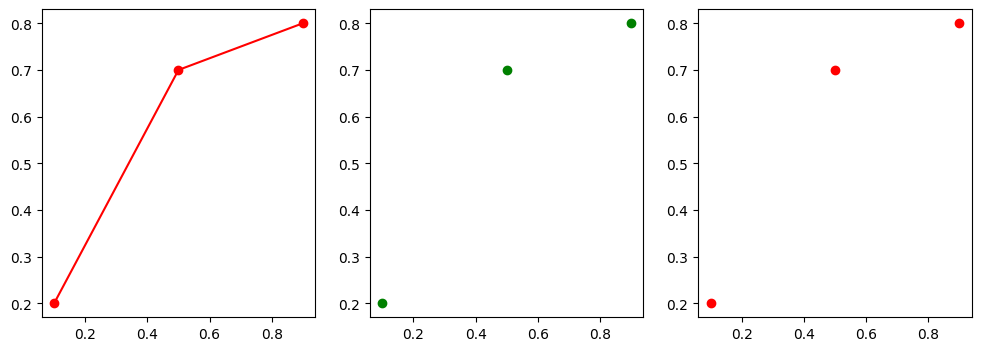

In [ ]:
locations=[(0.1,0.2),(0.5,0.7),(0.9,0.8)]

# Separate the x and y coordinates
x_values, y_values=zip(*locations)
print('X values:',x_values)
print('Y values:',y_values)

#Displaying the same figure in 2 subplots
fig,ax=plt.subplots(1,3)
fig.set_size_inches(12,4)
ax[0].plot(x_values, y_values,color='red',marker='o')
ax[1].plot(x_values, y_values,'go')
ax[2].plot(x_values, y_values, color='red',marker='o', linestyle='None')
plt.show()

Saving the figure using plt.savefig() method. Remember to save the figure before calling plt.show() otherwise the figure would be empty.

X values: (0.1, 0.5, 0.9)
Y values: (0.2, 0.7, 0.8)


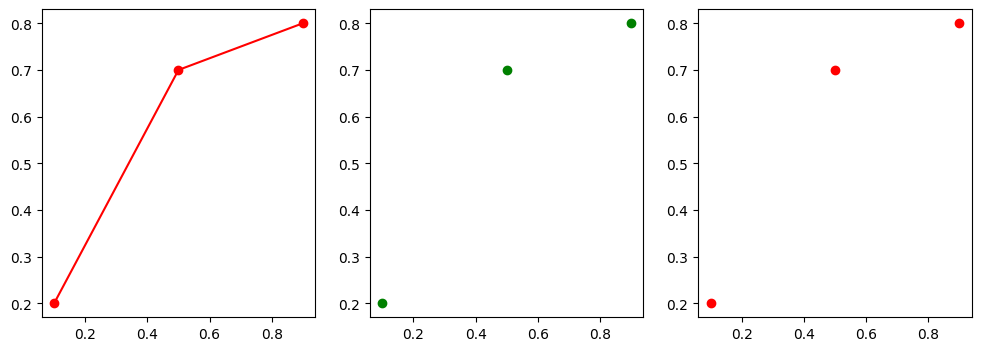

In [ ]:
locations=[(0.1,0.2),(0.5,0.7),(0.9,0.8)]

# Separate the x and y coordinates
x_values, y_values=zip(*locations)
print('X values:',x_values)
print('Y values:',y_values)

#Displaying the same figure in 2 subplots
fig,ax=plt.subplots(1,3)
fig.set_size_inches(12,4)
ax[0].plot(x_values, y_values,color='red',marker='o')
ax[1].plot(x_values, y_values,'go')
ax[2].plot(x_values, y_values, color='red',marker='o', linestyle='None')

#For saving the output figure
output_path='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/output'
output_file='locations.png'
output_file_path=os.path.join(output_path,output_file)
plt.savefig(output_file_path)
plt.show()

Exercise

point1 = (4, 1)
point2 = (3, 4)



Create a plot that displays the 2 given points with their x,y coordinates with different sumbology.

point1: Plot it with green color and a triangle marker.
point2: Plot it with red color and a circle marker.

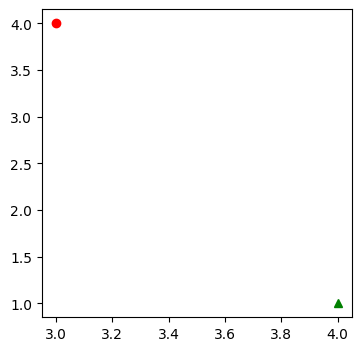

In [ ]:
point1=(4,1)
point2=(3,4)
# points=[point1,point2]
# x_values,y_values=zip(*points)

fig,ax=plt.subplots(1,1)
fig.set_size_inches(4,4)
ax.plot(point1[0],point1[1],color='green',marker='^',linestyle='None')
ax.plot(point2[0],point2[1],color='red',marker='o',linestyle='None')
plt.show()

#Day3: Creating Charts - Mapping and Data Visualization with Python -Crime data Analysis

Pandas allows you to read structured datasets and visualize them using the plot() method. By default, Pandas uses matplotlib to create the plots.

In this notebook, we will take work with open dataset of crime in London.

## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [ ]:
data_folder='data'
output_folder='output'
main_path='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/'
data_folder_path=os.path.join(main_path,data_folder)
output_folder_path=os.path.join(main_path,output_folder)

if not os.path.exists(data_folder_path):
  os.mkdir(data_folder_path)
if not os.path.exists(output_folder_path):
  os.mkdir(output_folder_path)

In [ ]:
def download(url):
    filename = os.path.join(data_folder_path, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

We have 12 different CSV files containing crime data for each month of 2020. We download each of them to the data folder.

In [ ]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/police.uk/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)

 Merging all 12 CSV files into a single dataframe. We can use pd.concat() to merge a list of dataframes.

In [ ]:
dataframe_list=[]


for f in files:
  filepath=os.path.join(data_folder_path,f)
  df=pd.read_csv(filepath)
  dataframe_list.append(df)
print('Dataframe list:', dataframe_list)

merged_df=pd.concat(dataframe_list)


Dataframe list: [                                                Crime ID    Month  \
0      24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...  2020-01   
1                                                    NaN  2020-01   
2                                                    NaN  2020-01   
3                                                    NaN  2020-01   
4                                                    NaN  2020-01   
...                                                  ...      ...   
90974  1f0459c148f5c6609c44cccf9b6006a05132412023aa2b...  2020-01   
90975  3210bc2510c9af88bb13acb1efd955d9105507e907d267...  2020-01   
90976  ee5d99124e125e4d50fe1a3aadfe9b5a565c8c2a0945c6...  2020-01   
90977  e372eaf2bac7efd4a199f709b103058ee8e4855df54f98...  2020-01   
90978  633f79212c05979d2a5026b18dceff1b15fcd9a30f2fd2...  2020-01   

                       Reported by                 Falls within  Longitude  \
0      Metropolitan Police Service  Metropolitan Police Service  -0.539301  

##Data Analysis

In [ ]:
merged_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [ ]:
merged_df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [ ]:
merged_df.shape

(1181922, 12)

The resulting dataframe consists of over 1 million records of various crimes recorded in London in the year 2020.

In [ ]:
#Different crime type registered
merged_df['Crime type'].unique()

array(['Other theft', 'Anti-social behaviour',
       'Criminal damage and arson', 'Vehicle crime',
       'Violence and sexual offences', 'Other crime', 'Robbery',
       'Burglary', 'Drugs', 'Possession of weapons', 'Public order',
       'Shoplifting', 'Theft from the person', 'Bicycle theft'],
      dtype=object)

In [ ]:
#Number of Different crime types registered
merged_df['Crime type'].nunique()

14

In [ ]:
#Different crime type registered with their counts
merged_df['Crime type'].value_counts()

,count
Crime type,
Anti-social behaviour,415105
Violence and sexual offences,227208
Vehicle crime,108344
Other theft,81924
Burglary,61044
Public order,53458
Drugs,51629
Criminal damage and arson,50923
Shoplifting,34588


Result: In 2020, anti-social behaviour was the most prevalent crime in London, with 415,105 cases reported. Following closely, violence and sexual offences ranked as the second largest category of crime registered.

##Create a pie chart

In [ ]:
#Creating pie chart for crime types.
#To get the statistics of the crimetypes, we will use groupby.
crime_type_counts = merged_df.groupby('Crime type').size()
crime_type_counts

,0
Crime type,
Anti-social behaviour,415105
Bicycle theft,23517
Burglary,61044
Criminal damage and arson,50923
Drugs,51629
Other crime,10066
Other theft,81924
Possession of weapons,5763
Public order,53458


<Axes: title={'center': 'Crime Types in London'}>

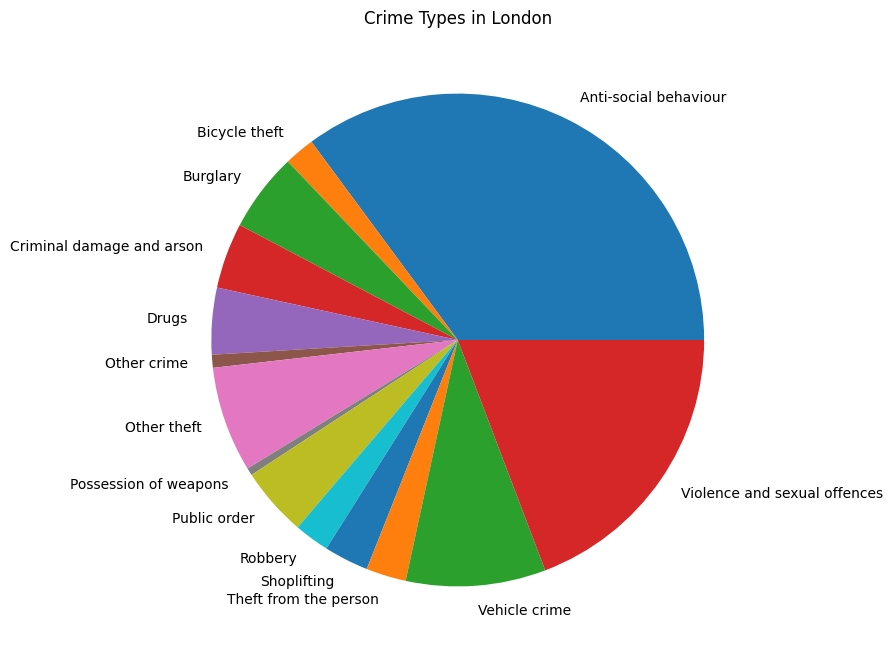

In [ ]:
fig=plt.figure(figsize=(10,8))
crime_type_counts.plot(kind='pie', title='Crime Types in London')

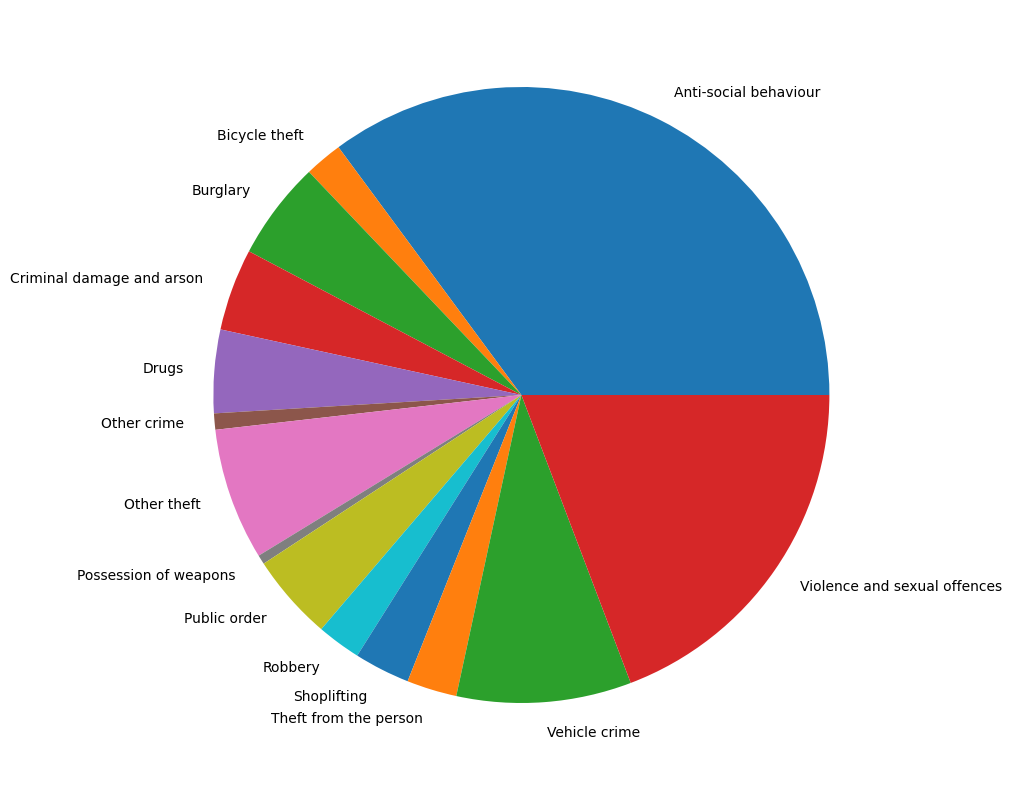

In [ ]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,10)
crime_type_counts.plot(kind='pie', ax=ax)
plt.show()

Let's customize the chart. First we use set_title() method to add a title to the chart and set_ylabel() to remove the empty y-axis label. Lastly, we use the plt.tight_layout() to remove the extra whitespace around the plot.

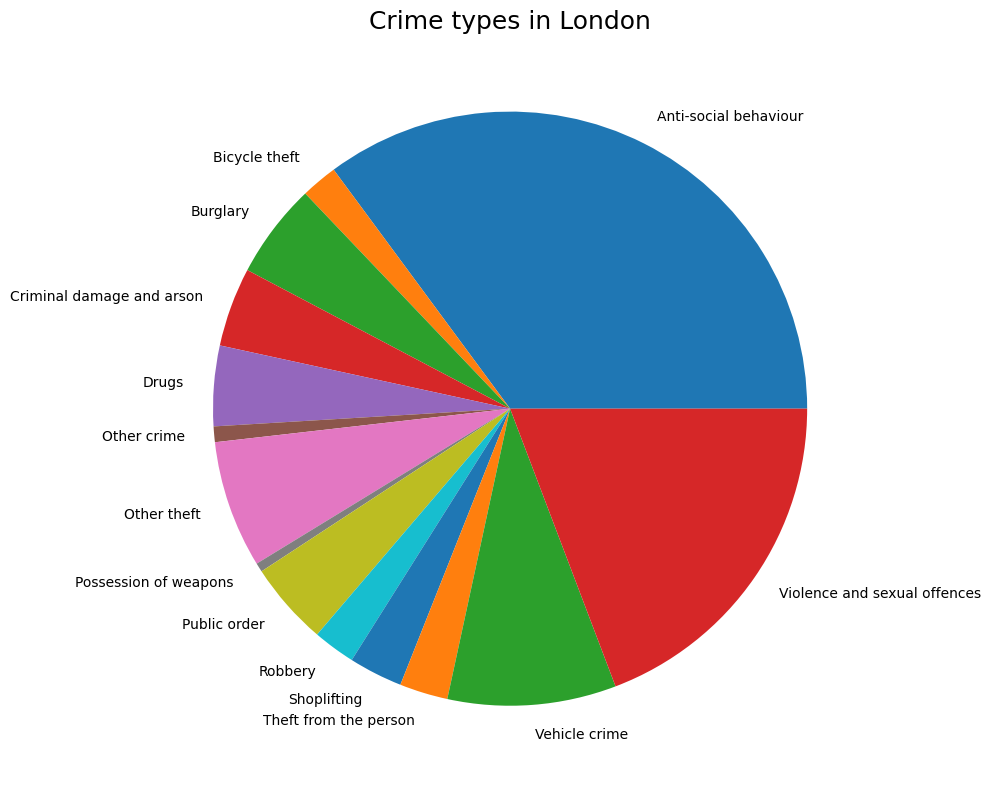

In [ ]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(10,8)
crime_type_counts.plot(kind='pie', ax=ax)

##Set title
ax.set_title('Crime types in London', fontsize=18)
#set y label
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Matplotlib plots offer unlimited possibilities to customize your charts. Let's see some of the options available to customize the pie-chart.

wedgeprops: Customize the look of each 'wedge' of the pie.
textprops: Set the text properties of labels.
Reference: matplotlib.pyplot.pie

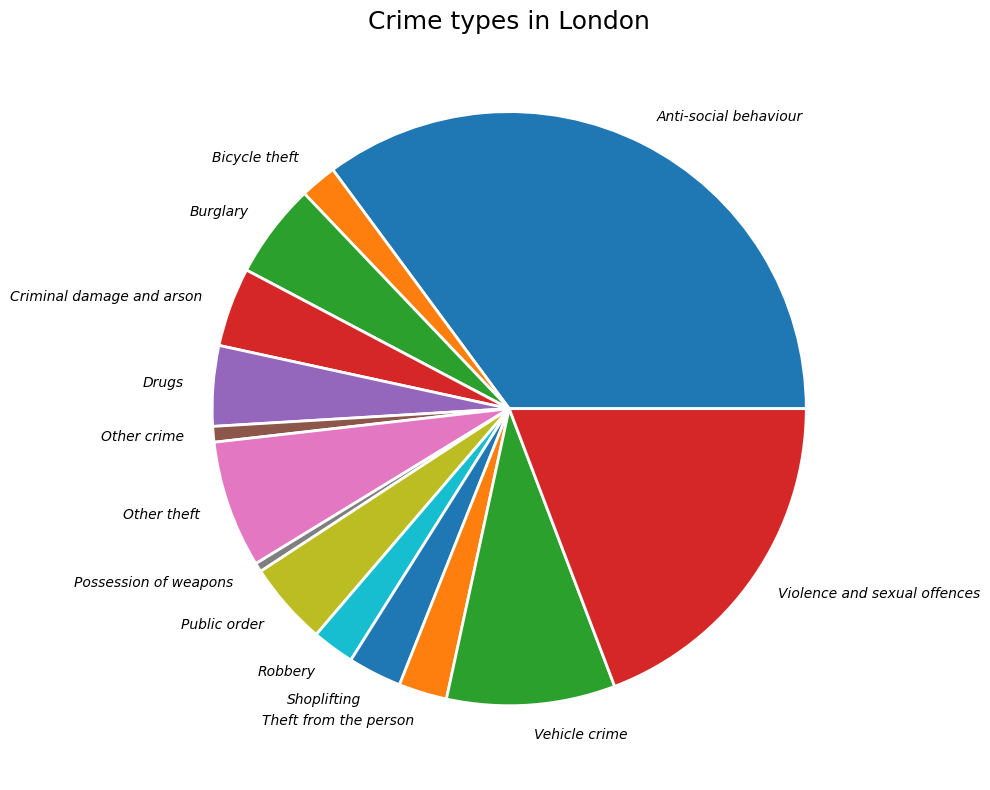

In [ ]:
wedgeprops={'linewidth':2,'edgecolor':'white'}
textprops={'fontsize':10, 'fontstyle':'italic'}

fig,ax=plt.subplots(1,1)
fig.set_size_inches(10,8)
crime_type_counts.plot(kind='pie', ax=ax,wedgeprops=wedgeprops,textprops=textprops)

##Set title
ax.set_title('Crime types in London', fontsize=18)
#set y label
ax.set_ylabel('')

plt.tight_layout()
plt.show()

##Create Bar chart

We can also chart the trend of crime over the year. For this, let's group the data by month.

In [ ]:
monthly_crimes=merged_df.groupby('Month').size()
monthly_crimes

,0
Month,
2020-01,90979
2020-02,86984
2020-03,87409
2020-04,109951
2020-05,114008
2020-06,100198
2020-07,103657
2020-08,104782
2020-09,99633


In [ ]:
# monthly_crime_sum=merged_df.groupby('Month').sum()
# monthly_crime_sum

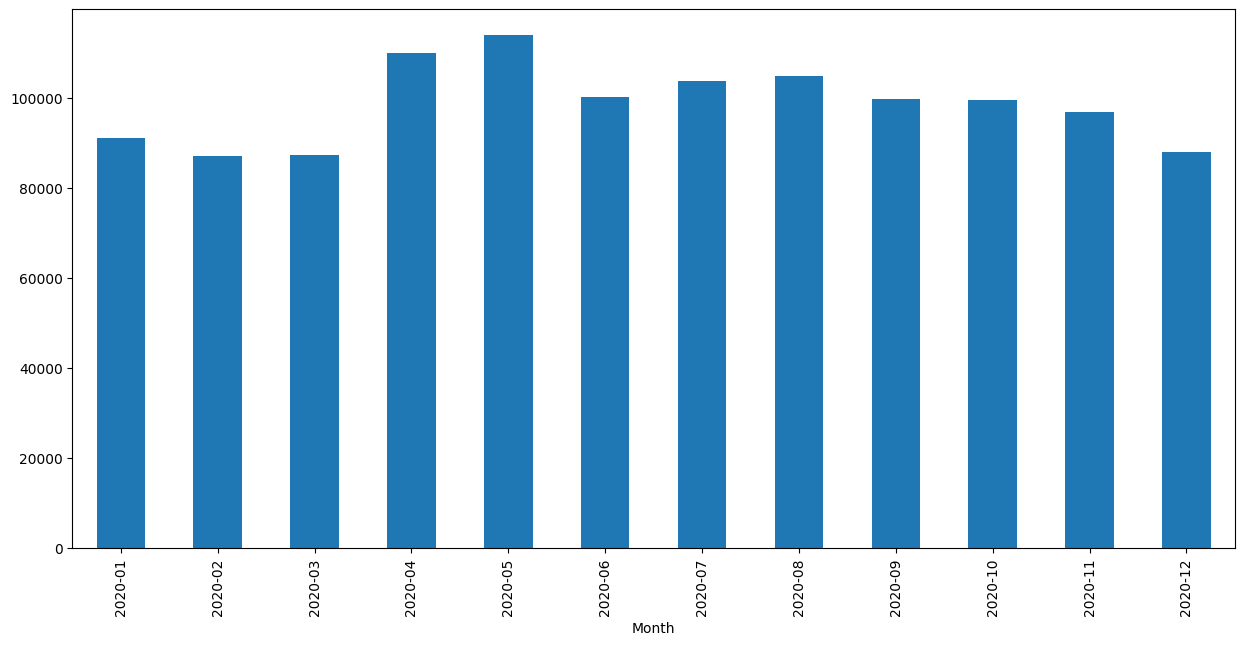

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_crimes.plot(kind='bar', ax=ax)
plt.show()

As we learnt earlier, we can add multiple plots on the same Axes. We can add a line chart along with the bar chart to show the trendline as well. Lastly we add the titles and axis labels to finish the chart.

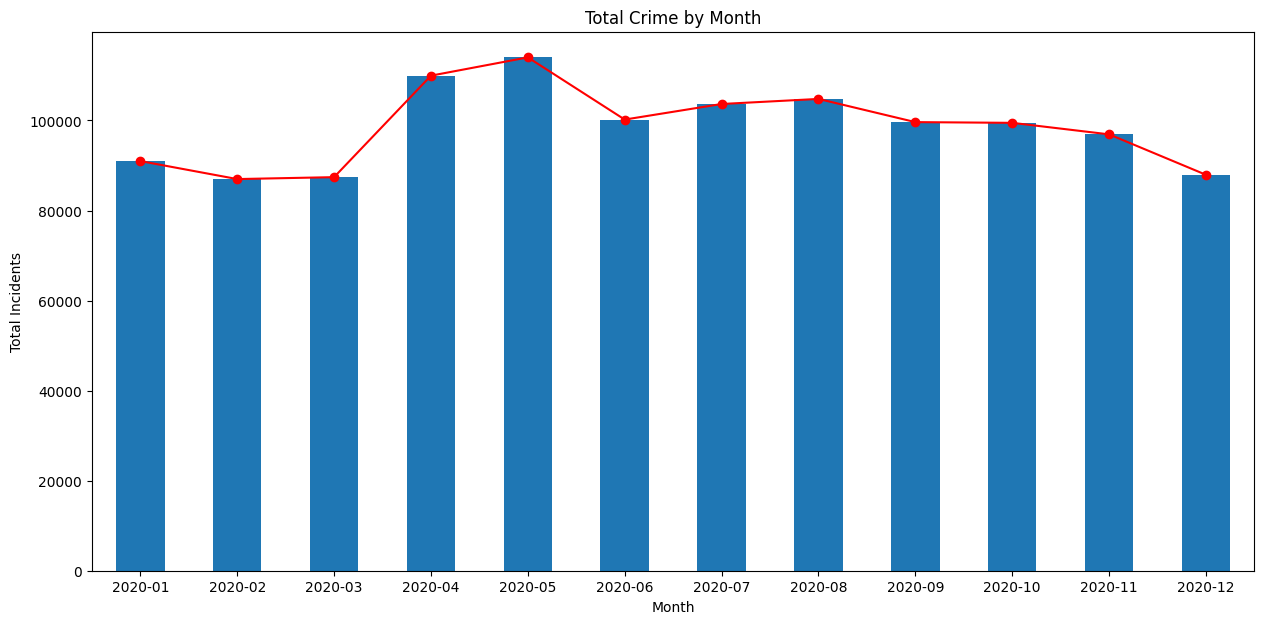

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_crimes.plot(kind='bar', ax=ax)
monthly_crimes.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

#Exercise

Plot the trend of Bicycle thefts as a line chart.    The cell below filters the merged_df dataframe to select incidents of 'Bicycle theft'. Group the results by months and plot the results.

In [ ]:
bicycle_theft=merged_df[merged_df['Crime type']=='Bicycle theft']
bicycle_theft

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
360,c094393925bb094348a2d13933aaa0d0b38c12a09c0e7c...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.153621,51.552200,On or near Sedgemoor Drive,E01000064,Barking and Dagenham 006E,Bicycle theft,Investigation complete; no suspect identified,NaN
619,6984333ffb944f2fd3b5045bccfe35ed2796799e57cbce...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.165546,51.545110,On or near Police Station,E01000036,Barking and Dagenham 010B,Bicycle theft,Status update unavailable,NaN
1075,f2d8f21dc493c1167f32e34b143a8291cb4a18342fe037...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.076951,51.536326,On or near East Street,E01000010,Barking and Dagenham 015C,Bicycle theft,Investigation complete; no suspect identified,NaN
1076,e0b29f9c97d5916a1e36a2873147bdd1cbfdfa0264a95e...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.080059,51.537440,On or near Police Station,E01000010,Barking and Dagenham 015C,Bicycle theft,Status update unavailable,NaN
1077,d3967d5b1463721962ca92c89462e165343cf06385acf5...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.077044,51.537106,On or near Parking Area,E01000010,Barking and Dagenham 015C,Bicycle theft,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87552,afded920f8373a6acbba1bdfc2c193c8842fae831bc111...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87553,780d16d9d7fc3bb50c788e163bc0fd5f24d66a6eca2d99...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87554,156a673e7839c26a04a0722edea954c9fb8782f4d8ef4f...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN
87555,7e9b8c2ad6d822f32ae53222669f732a24f0efde68c786...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Investigation complete; no suspect identified,NaN


In [ ]:
bicycle_theft_monthly=bicycle_theft.groupby('Month').size()
bicycle_theft_monthly

,0
Month,
2020-01,1172
2020-02,1044
2020-03,1078
2020-04,1060
2020-05,1768
2020-06,2548
2020-07,2833
2020-08,3019
2020-09,3078


<Axes: title={'center': 'Bicycles thefts by Month'}, xlabel='Month', ylabel='Total Incidents'>

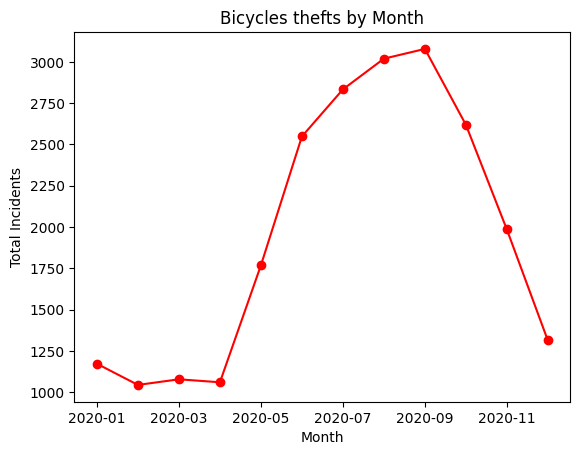

In [ ]:
bicycle_theft_monthly.plot(kind='line', color='red',marker='o', title='Bicycles thefts by Month', ylabel='Total Incidents')


#Using Matplotlib Themes - Mapping and Data Visualization with Python

The bar chart cretaed above does not looks very pretty. We can set themes using seaborn in  matplotlib.

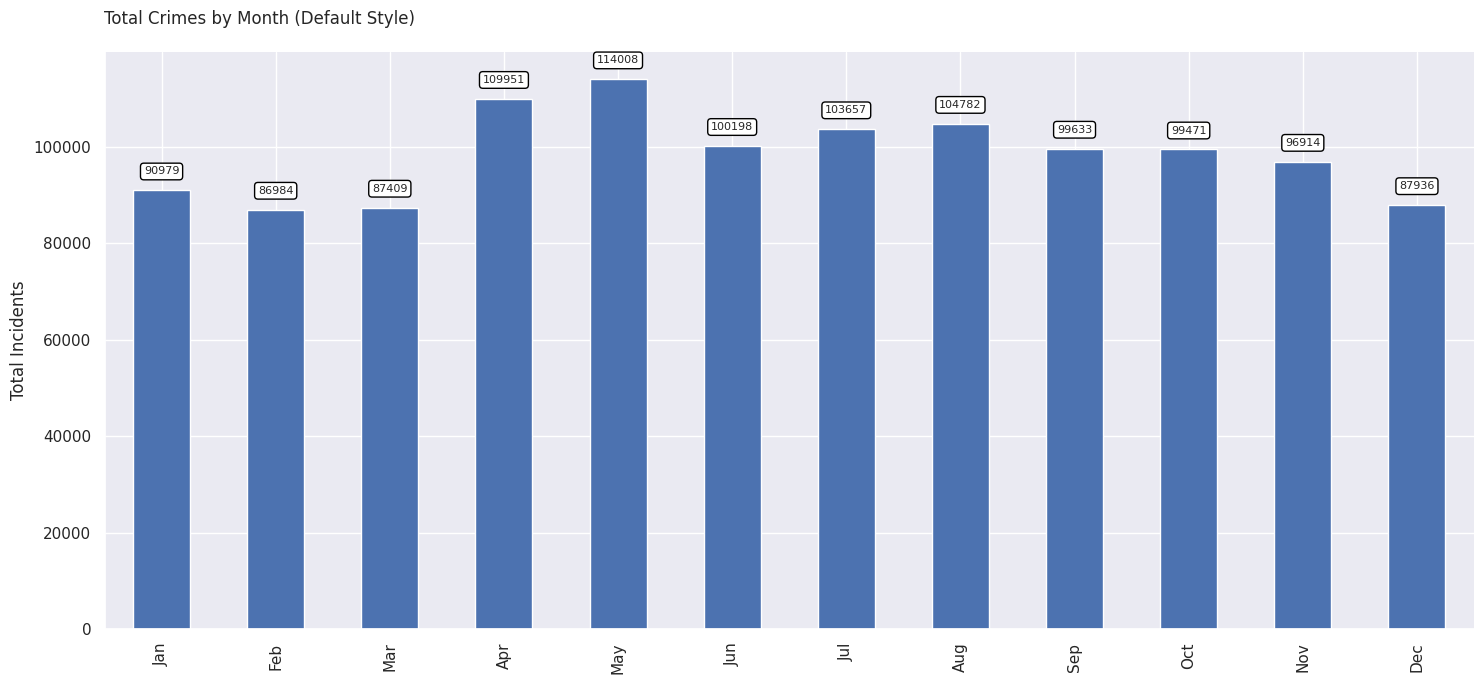

In [ ]:
import numpy as np

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
bars=monthly_crimes.plot(kind='bar', ax=ax)
ax.set_title('Total Crimes by Month (Default Style)', loc='left', pad=20)
ax.set_xlabel('')
ax.set_ylabel('Total Incidents')
ax.set_xticks(np.arange(len(monthly_crimes)))

# Extra: Add labels on bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 10),
        fontsize=8,
        textcoords="offset points", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))


# Extra: Custmize X-Axis labels

labels = []
for date in pd.to_datetime(monthly_crimes.index):
  labels.append(date.strftime('%b'))
ax.set_xticklabels(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

#output_path = os.path.join(output_folder, 'default.png')
#plt.savefig(output_path, dpi=300)

plt.show()

#Using Seaborn

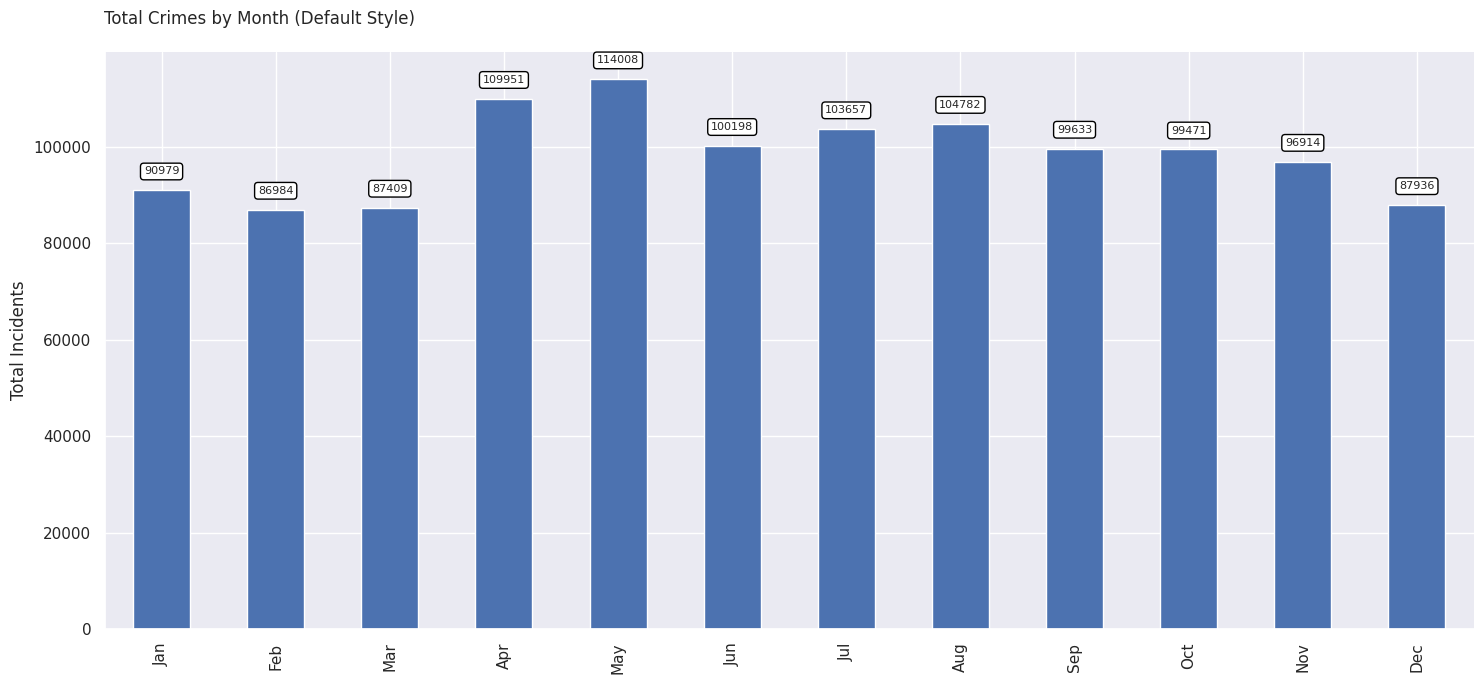

In [ ]:
import numpy as np
import seasorn as sns
sns.set_theme()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
bars=monthly_crimes.plot(kind='bar', ax=ax)
ax.set_title('Total Crimes by Month (Default Style)', loc='left', pad=20)
ax.set_xlabel('')
ax.set_ylabel('Total Incidents')
ax.set_xticks(np.arange(len(monthly_crimes)))

# Extra: Add labels on bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 10),
        fontsize=8,
        textcoords="offset points", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))


# Extra: Custmize X-Axis labels

labels = []
for date in pd.to_datetime(monthly_crimes.index):
  labels.append(date.strftime('%b'))
ax.set_xticklabels(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

#output_path = os.path.join(output_folder, 'default.png')
#plt.savefig(output_path, dpi=300)

plt.show()

Matplotlib comes with many built-in themes. Let's see what styles are available.

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

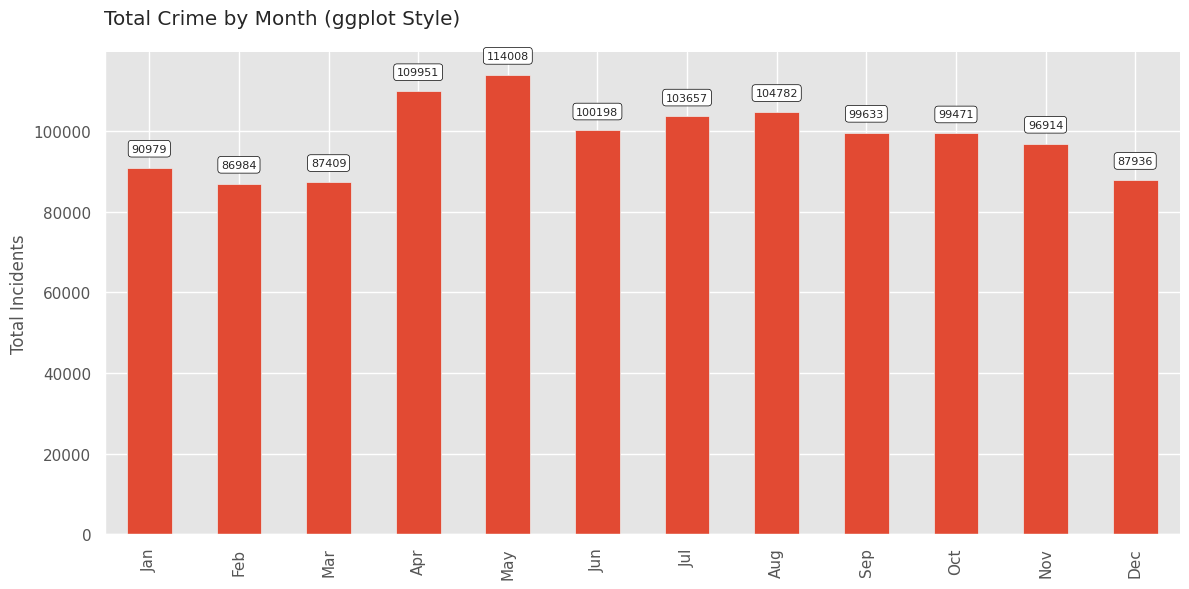

In [ ]:
# Use ggplot style
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,6)
bars = monthly_crimes.plot(kind='bar', ax=ax)

ax.set_title('Total Crime by Month (ggplot Style)', loc='left', pad=20)
ax.set_xlabel('')
ax.set_ylabel('Total Incidents')
ax.set_xticks(np.arange(len(monthly_crimes)))

# Extra: Add labels on bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 10),
        fontsize=8,
        textcoords="offset points", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Extra: Custmize X-Axis labels

labels = []
for date in pd.to_datetime(monthly_crimes.index):
  labels.append(date.strftime('%b'))
ax.set_xticklabels(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

#output_path = os.path.join(output_folder, 'ggplot.png')
#plt.savefig(output_path, dpi=300)

plt.show()

#Day4:Creating Maps - Mapping and Data Visualization with Python -Population density maps

##Overview

Similar to Pandas, GeoPandas has a plot() method that can plot geospatial data using Matplotlib.

We will work with census data to create a choropleth map of population density. We will start with a shapefile of census tracts, and join it with tabular data to get a GeoDataframe with census tract geometry and correponding populations.

##Data setup and download

In [80]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

Downloading census tracts shapefile and a CSV file containing a variety of population statistics for each tract from github account

In [78]:
#Downloading shapefile
shapefile_name='tl_2019_06_tract'
shapefile_exts=['.shp','.shx','.dbf','.prj']
#data_url='https://github.com/spatialthoughts/python-dataviz-web/tree/census/data/census/' #does not work
data_url='https://github.com/spatialthoughts/python-dataviz-web/releases/download/census/'
#data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \ 'download/census/'   #Given by spatial thoughts
for ext in shapefile_exts:
  url= data_url + shapefile_name + ext
  download(url)

In [79]:
#Downloading csv from same github link
csv_filename='ACSST5Y2019.S0101_data.csv'
csv_url= data_url+csv_filename
download(csv_url)

##Data Preprocessing

In [81]:
#Reading a tracts shape file
shapefile_path=os.path.join(data_folder_path,shapefile_name+'.shp')
shapefile_path

'/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/tl_2019_06_tract.shp'

In [82]:
tracts=gpd.read_file(shapefile_path)
tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17..."
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180..."
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1..."
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52..."
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522..."
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5..."
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4..."


In [83]:
#Read the csv file
csv_file_path=os.path.join(data_folder_path,csv_filename)
df=pd.read_csv(csv_file_path)
df

<ipython-input-83-a6275bc7f6bb>:3: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(csv_file_path)


,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!5 to 9...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!10 to ...,Margin of Error!!Total!!Total population!!AGE!...,...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...
1,1400000US06001400100,"Census Tract 4001, Alameda County, California",3120,208,188,94,56,49,168,73,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,1400000US06001400200,"Census Tract 4002, Alameda County, California",2007,120,142,50,68,30,122,46,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1400000US06001400300,"Census Tract 4003, Alameda County, California",5051,309,204,120,373,114,104,80,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1400000US06001400400,"Census Tract 4004, Alameda County, California",4007,344,180,70,196,96,271,103,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8053,1400000US06115040800,"Census Tract 408, Yuba County, California",4652,247,173,101,292,83,275,90,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8054,1400000US06115040901,"Census Tract 409.01, Yuba County, California",2720,298,153,81,219,98,84,40,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8055,1400000US06115040902,"Census Tract 409.02, Yuba County, California",1653,334,140,71,99,48,124,100,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8056,1400000US06115041000,"Census Tract 410, Yuba County, California",7298,789,580,208,534,176,476,276,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


 The CSV file contains an extra row before the header, so we specify skiprows=[1] to skip reading it.

In [84]:
#Read the csv file
csv_file_path=os.path.join(data_folder_path,csv_filename)
table=pd.read_csv(csv_file_path,skiprows=[1])
table

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,1400000US06001400100,"Census Tract 4001, Alameda County, California",3120,208,188,94,56,49,168,73,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,1400000US06001400200,"Census Tract 4002, Alameda County, California",2007,120,142,50,68,30,122,46,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,1400000US06001400300,"Census Tract 4003, Alameda County, California",5051,309,204,120,373,114,104,80,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1400000US06001400400,"Census Tract 4004, Alameda County, California",4007,344,180,70,196,96,271,103,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1400000US06001400500,"Census Tract 4005, Alameda County, California",4124,357,254,82,122,55,168,87,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,1400000US06115040800,"Census Tract 408, Yuba County, California",4652,247,173,101,292,83,275,90,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8053,1400000US06115040901,"Census Tract 409.01, Yuba County, California",2720,298,153,81,219,98,84,40,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8054,1400000US06115040902,"Census Tract 409.02, Yuba County, California",1653,334,140,71,99,48,124,100,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8055,1400000US06115041000,"Census Tract 410, Yuba County, California",7298,789,580,208,534,176,476,276,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [ ]:
tracts.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [ ]:
table.columns

Index(['GEO_ID', 'NAME', 'S0101_C01_001E', 'S0101_C01_001M', 'S0101_C01_002E',
       'S0101_C01_002M', 'S0101_C01_003E', 'S0101_C01_003M', 'S0101_C01_004E',
       'S0101_C01_004M',
       ...
       'S0101_C06_034E', 'S0101_C06_034M', 'S0101_C06_035E', 'S0101_C06_035M',
       'S0101_C06_036E', 'S0101_C06_036M', 'S0101_C06_037E', 'S0101_C06_037M',
       'S0101_C06_038E', 'S0101_C06_038M'],
      dtype='object', length=458)

In [ ]:
#Print shape of tracts and table
print('Shape of tracts:',tracts.shape)
print('Shape of table:',table.shape)

Shape of tracts: (8057, 13)
Shape of table: (8057, 458)


To join (table) DataFrame with the (tracts) GeoDataFrame, we need a column with unique identifiers. We use the GEOID column and process the id so they match exactly in both datasets. Here we will create a column called 'GEOID' for joining two dataframes.

In [85]:
#Filtering the table data
filtered=table[['GEO_ID', 'NAME', 'S0101_C01_001E']]
filtered=filtered.rename(columns={'S0101_C01_001E':'Population','GEO_ID':'GEOID'})
filtered
#Get only the last 11 characters of the GEOID
filtered['GEOID']=filtered['GEOID'].str[-11:]
filtered

,GEOID,NAME,Population
0,06001400100,"Census Tract 4001, Alameda County, California",3120
1,06001400200,"Census Tract 4002, Alameda County, California",2007
2,06001400300,"Census Tract 4003, Alameda County, California",5051
3,06001400400,"Census Tract 4004, Alameda County, California",4007
4,06001400500,"Census Tract 4005, Alameda County, California",4124
...,...,...,...
8052,06115040800,"Census Tract 408, Yuba County, California",4652
8053,06115040901,"Census Tract 409.01, Yuba County, California",2720
8054,06115040902,"Census Tract 409.02, Yuba County, California",1653
8055,06115041000,"Census Tract 410, Yuba County, California",7298


Join the datafarames (ie., tracts and filtered) based on GEOID column

In [86]:
#Hee Population column will be added to the existing tracts geodataframe
tracts_gdf=tracts.merge(filtered,on='GEOID')
tracts_gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52...","Census Tract 4430.01, Alameda County, California",2891
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522...","Census Tract 4430.02, Alameda County, California",6930
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5...","Census Tract 4431.02, Alameda County, California",5065
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4...","Census Tract 4433.01, Alameda County, California",4355


#Create Choropleth maps

For creating a choropleth map, we must normalize the population counts. US Census Bureau [recommends](https://www.census.gov/quickfacts/fact/note/US/LND110210) calculating the population density by dividing the total population by the land area. The original shapefile contains a column `ALAND` with the land area in square kilometers. Using it, we compute a new column `density` containing the persons per square kilometer.

In [87]:
#Calculating population density
tracts_gdf['density_sqkm']=(tracts_gdf['Population']/tracts_gdf['ALAND'])*1e6
tracts_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population,density_sqkm
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445,1551.127717
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000,14780.261847
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917,2784.597937
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060,2042.396272
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320,1566.366231


In [108]:
tracts_gdf['NAME_y']

,NAME_y
0,"Census Tract 1393.01, Los Angeles County, Cali..."
1,"Census Tract 1393.02, Los Angeles County, Cali..."
2,"Census Tract 1395.02, Los Angeles County, Cali..."
3,"Census Tract 1396, Los Angeles County, California"
4,"Census Tract 1397.01, Los Angeles County, Cali..."
...,...
8052,"Census Tract 4430.01, Alameda County, California"
8053,"Census Tract 4430.02, Alameda County, California"
8054,"Census Tract 4431.02, Alameda County, California"
8055,"Census Tract 4433.01, Alameda County, California"


The `plot()` method will render the data to a plot.

Reference: [geopandas.GeoDataFrame.plot](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html)

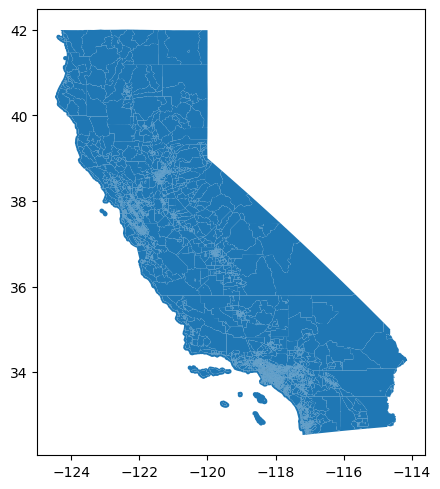

In [ ]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,10)
tracts_gdf.plot(ax=ax)
plt.show()

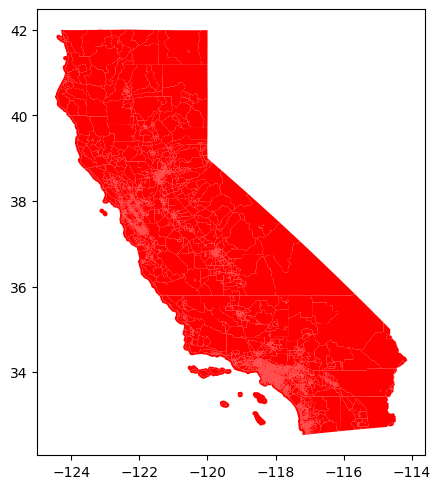

In [ ]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,10)
tracts_gdf.plot(ax=ax, color='red')
plt.show()

You can supply additional style options to change the appearance of the map. facecolor and edgecolor parameters are used to determine the fill and outline colors respectively. The stroke width can be adjusted using the linewidth parameter.

<Axes: >

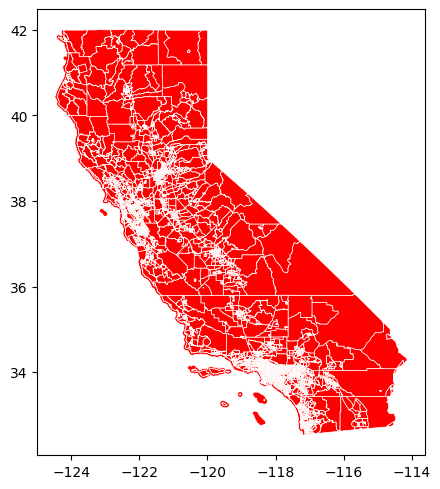

In [ ]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,10)
tracts_gdf.plot(ax=ax, facecolor='red',edgecolor='white', linewidth=0.5)
plt.show()

##Creating Choropleth map based on density column in df and assign colors based on values in density column

We have the population density for each tract in the `density` column. We can assign a color to each polygon based on the value in this column - resulting in a choropleth map. Additionally, we need to specify a color ramp using `cmap` and classification scheme using `scheme`. The classification schedule will determine how the continuous data will be classified into discrete bins.

> Tip: You can add `_r` to any color ramp name to get a **r**eversed version of that ramp.

References:
- [Matplotlib Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Mapclassify Classification Schemes](https://pysal.org/mapclassify/generated/mapclassify.classify.html#mapclassify.classify)

Installing mapclassify

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install mapclassify

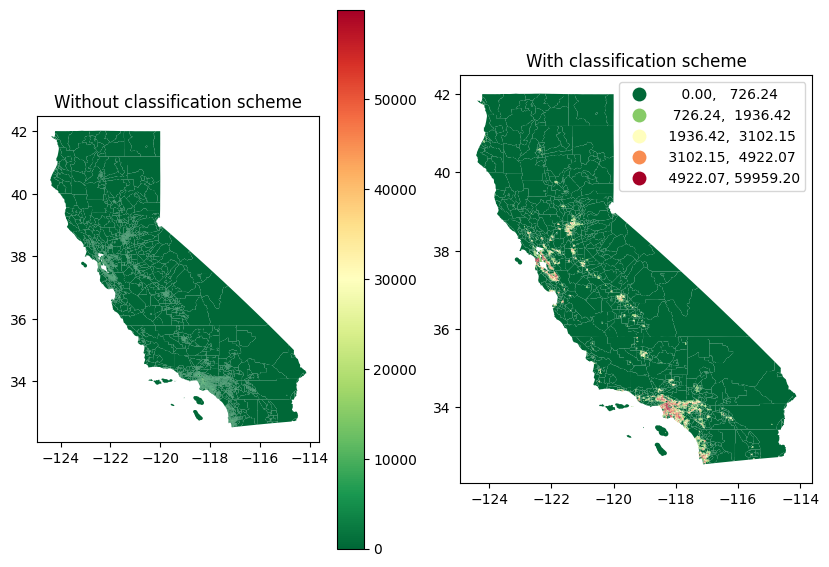

In [ ]:
import mapclassify
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,7)
tracts_gdf.plot(ax=ax[0],column='density_sqkm',cmap='RdYlGn_r',legend=True) #Here it is using continous data
ax[0].set_title('Without classification scheme')

#To visualise the map in different we need to calssify the data to set colors. For this we have classification schemes (scheme)
tracts_gdf.plot(ax=ax[1],column='density_sqkm',cmap='RdYlGn_r', scheme='quantiles',legend=True)
ax[1].set_title('With classification scheme')
##gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='quantiles')
plt.show()

Instead of the class breaks being determined by the classification scheme, we can also manually specify the ranges. This is preferable so we can have a human-interpretable legend. The legend=True parameter adds a legend to our plot.

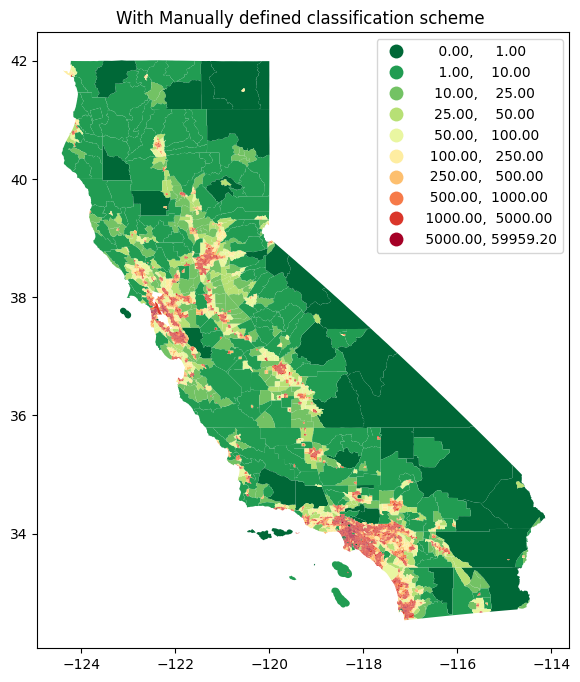

In [ ]:
import mapclassify
classification_kwds={
    'bins': [1,10,25,50,100, 250, 500, 1000, 5000]
}

fig,ax=plt.subplots(1,1)
fig.set_size_inches(10,8)
#To visualise the map in different we need to calssify the data to set colors. For this we have classification schemes (scheme)
tracts_gdf.plot(ax=ax,column='density_sqkm',cmap='RdYlGn_r', scheme='User_Defined',classification_kwds=classification_kwds,legend=True)
ax.set_title('With Manually defined classification scheme ')
plt.show()

We can supply legend customization options via the legend_kwds parameter and adjust the legend position, formatting of the text, and add a legend title. We can also manually adjust the legend entries, to give a more legible labels.

**loc**: 'upper right'
This sets the location of the legend to the upper-right corner of the plot or its bounding box.

**bbox_to_anchor**: (0.8, 0.9)
This parameter fine-tunes the position of the legend using coordinates relative to the plot. In this case, the legend's anchor point is positioned at 80% from the left and 90% from the bottom of the plot area. It helps to control where the legend appears on the plot.

**fmt:** '{:<5.0f}'
This specifies the format of the labels in the legend. The format string '{:<5.0f}' means the labels are displayed as floating-point numbers, left-aligned, with no decimal places and a width of 5 characters.

**frameon:** False
This removes the frame or border around the legend, making the legend background transparent.

**fontsize:** 8
This sets the font size of the text inside the legend to 8, making the labels in the legend smaller.

**title:** 'persons/sq.km.'
This sets the title of the legend to persons/sq.km., which typically indicates the unit of the data represented in the legend.

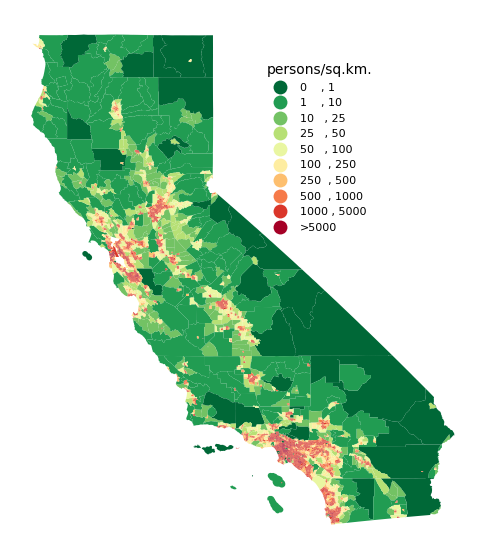

In [ ]:
legend_kwds= {
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.92),
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 8,
  'title': 'persons/sq.km.'
}
classification_kwds={
  'bins':[1,10,25,50,100, 250, 500, 1000, 5000]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9,7)
tracts_gdf.plot(ax=ax, column='density_sqkm', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds)
#To remove axis of the plot
ax.set_axis_off()

# Change the last entry in the legend to '>5000'
legend=ax.get_legend()
legend.texts[-1].set_text('>5000')

plt.show()

Replacing commas with '-' in legend

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a custom formatting function
def format_legend_labels(x):
    if x == 5000:  # handle the upper limit case
        return f'>{x}'
    return f'{int(x)}-{int(x + (x * 0.5))}'

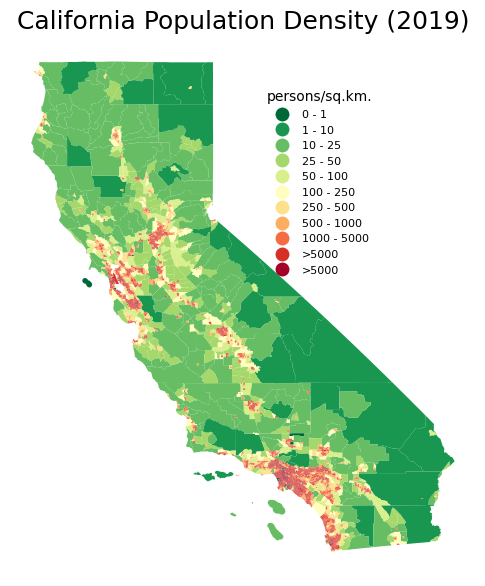

In [88]:
legend_kwds= {
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.92),
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 8,
  'title': 'persons/sq.km.'
}
classification_kwds={
  'bins':[0,1,10,25,50,100, 250, 500, 1000, 5000]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9,7)
tracts_gdf.plot(ax=ax, column='density_sqkm', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds)
#To remove axis of the plot
ax.set_axis_off()
#Set title
ax.set_title('California Population Density (2019)', size=18)
# Get the actual legend text items after plotting
legend_items = ax.get_legend().get_texts()

# Update legend labels with custom format
for i, text in enumerate(legend_items):
    if i < len(classification_kwds['bins'])-1:
        lower_bound = classification_kwds['bins'][i]
        upper_bound = classification_kwds['bins'][i + 1]
        text.set_text(f"{lower_bound} - {upper_bound}")
    else:
        # Handle the last bin
        text.set_text(f">{classification_kwds['bins'][-1]}")

#Saving the figure
output_path=os.path.join(output_folder_path,'California_Population_Density.png')
plt.savefig(output_path, dpi=300)

plt.show()

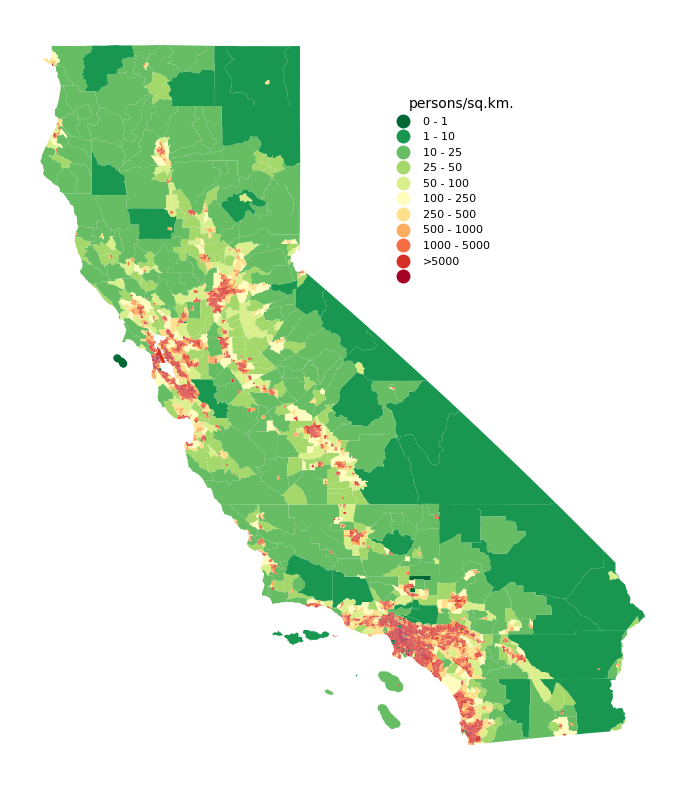

In [ ]:
import matplotlib.pyplot as plt

# Updated bins with starting point of 0
classification_kwds = {
    'bins': [0, 1, 10, 25, 50, 100, 250, 500, 1000, 5000]
}

legend_kwds = {
    'loc': 'upper right',
    'bbox_to_anchor': (0.8, 0.9),
    'frameon': False,
    'fontsize': 8,
    'title': 'persons/sq.km.',
}

# Create the plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)

# Plotting the data
tracts_gdf.plot(ax=ax, column='density_sqkm', cmap='RdYlGn_r', scheme='User_Defined',
                classification_kwds=classification_kwds,
                legend=True, legend_kwds=legend_kwds)

# Get the actual legend text items after plotting
legend_items = ax.get_legend().get_texts()

# Update legend labels with custom format
for i, text in enumerate(legend_items):
    if i < len(classification_kwds['bins']) - 1:
        lower_bound = classification_kwds['bins'][i]
        upper_bound = classification_kwds['bins'][i + 1]
        text.set_text(f"{lower_bound} - {upper_bound}")
    elif i == len(classification_kwds['bins']) - 1:
        # Only set the last bin as "5000+"
        text.set_text(f">{classification_kwds['bins'][-1]}")
# Remove the last item from the legend if it exists
if len(legend_items) > len(classification_kwds['bins']):
    legend_items[-1].set_visible(False)
# To remove the axis of the plot
ax.set_axis_off()
plt.show()


##Exercise

1.Plot the census tracts geodataframe tracts with just outlines and no fill color.

2.Display the map zoomed-in around the San Francisco area between Latitudes from 37.71 to 37.82 and Longitudes from -122.53 to -122.36.

<Axes: >

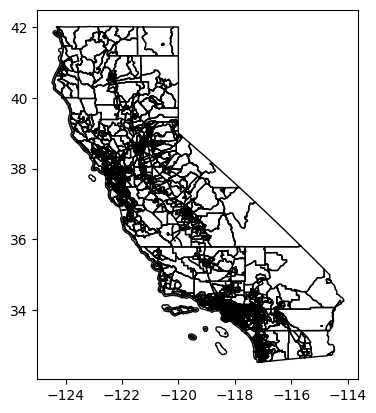

In [90]:
tracts_gdf.plot(facecolor='None')

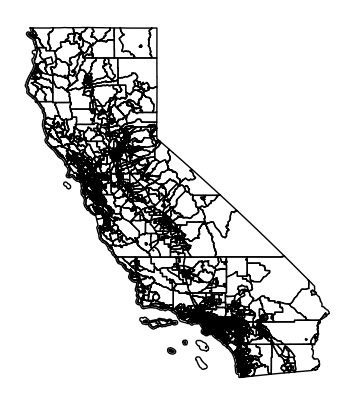

In [91]:
#1.Plot the census tracts geodataframe tracts with just outlines and no fill color.
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
tracts_gdf.plot(ax=ax,facecolor='None')
ax.set_axis_off()
plt.show()

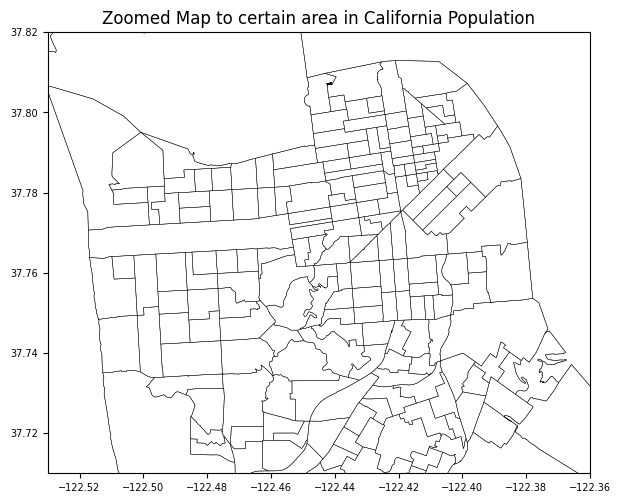

In [106]:
#2.Display the map zoomed-in around the San Francisco area between Latitudes from 37.71 to 37.82 and Longitudes from -122.53 to -122.36.
fig,ax=plt.subplots(1,1)
fig.set_size_inches(7,7)
tracts_gdf.plot(ax=ax,facecolor='None', linewidth=0.3)
ax.set_title('Zoomed Map to certain area in California Population')
ax.set_xlim([-122.53,-122.36])
ax.set_ylim([37.71,37.82])
#ax.set_xticks(fontsize=25)
# Change the font size of the x-tick labels
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
plt.show()

Issues

1.Unable to download from the github path  (but works for path given by spatial thoughts). How to get the path given by spatial thoughts?